## 📈 Análise de Dados Populacionais do estado do MA

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leitura do CSV ignorando as primeiras linhas de texto
df = pd.read_csv('../data/Planilha do Desafio 2 -Trilhas 2B - Dados do MA.csv', skiprows=1)
df

,Ano,População Estimada,PIB Estimado (R$ em Bilhões),Renda per capita
0,2010,6.574.789,"R$52,10","R$ 660,00"
1,2011,6.651.000,"R$52,20","R$ 665,00"
2,2012,6.727.000,"R$58,80","R$ 682,00"
3,2013,6.803.000,"R$68,50","R$ 680,00"
4,2014,6.850.884,"R$76,84","R$ 690,00"
5,2015,6.904.241,"R$78,48",NaN
6,2016,6.954.036,"R$85,31","R$ 694,00"
7,2017,7.001.161,"R$89,54",NaN
8,2018,7.045.055,"R$98,18","R$ 709,00"
9,2019,7.087.262,"R$97,34","R$ 754,00"


In [3]:
# Identificação dos tipos de dados para saber se é necessário fazer alguma conversão
df.dtypes

Ano                              int64
População Estimada              object
PIB Estimado (R$ em Bilhões)    object
Renda per capita                object
dtype: object

In [4]:
# Remoção dos pontos de milhar e milhão e conversão a população para int
df["População Estimada"] = df["População Estimada"].str.replace('.', '').astype(int)

In [5]:
# Remoção do "R$" e conversão PIB e Renda per capita para float
df["PIB Estimado (R$ em Bilhões)"] = df["PIB Estimado (R$ em Bilhões)"].replace({r'R\$': '', ',': '.'}, regex=True).astype(float)
df["Renda per capita"] = df["Renda per capita"].replace({r'R\$ ': '', ',': '.'}, regex=True).astype(float)

In [6]:
# Verificação dos tipos e valores nulos após as conversões
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ano                           15 non-null     int64  
 1   População Estimada            15 non-null     int32  
 2   PIB Estimado (R$ em Bilhões)  15 non-null     float64
 3   Renda per capita              12 non-null     float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 552.0 bytes


### ❓ Respostas das análises 

##### 1️⃣ Criação dos gráficos mais adequados para visualizar a estimativa da população, o PIB e a renda per capita entre 2010 e 2024. Certifique-se de incluir títulos e legendas apropriados, além de identificar claramente cada eixo com descrições relevantes

1.1. População Estimada

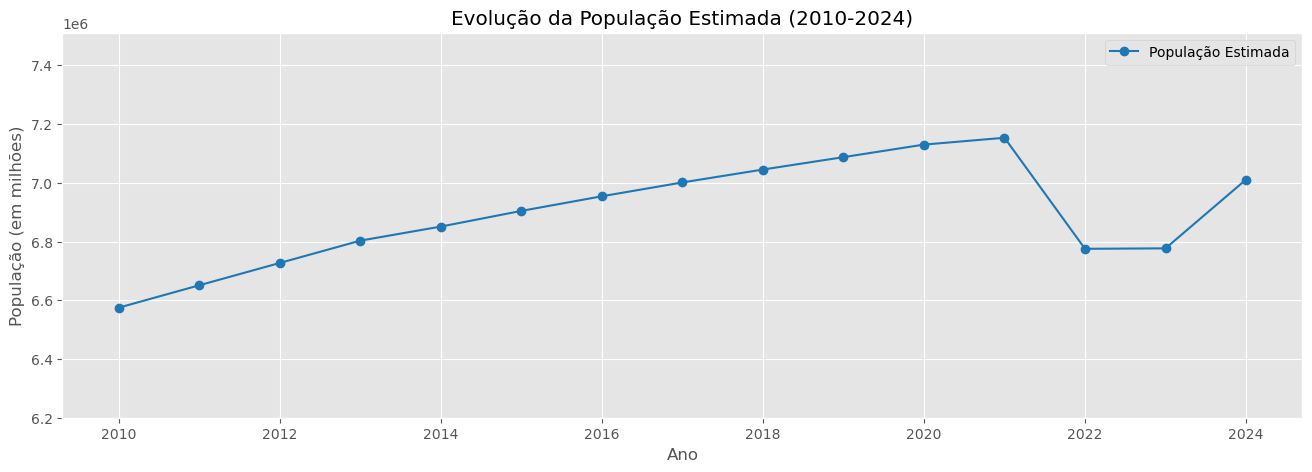

In [7]:
# Configuração do estilo
plt.style.use('ggplot')

# Criando o gráfico de linha
plt.figure(figsize=(16, 5))
plt.plot(df["Ano"], df["População Estimada"], marker='o', linestyle='-', color='tab:blue', label="População Estimada")

# Configuração do gráfico
plt.xlabel("Ano")
plt.ylabel("População (em milhões)")
plt.title("Evolução da População Estimada (2010-2024)")
plt.legend()
plt.grid(True)

plt.ylim(6_200_000, df['População Estimada'].max() * 1.05)

# Exibindo o gráfico
plt.show()

1.2 PIB Estimado

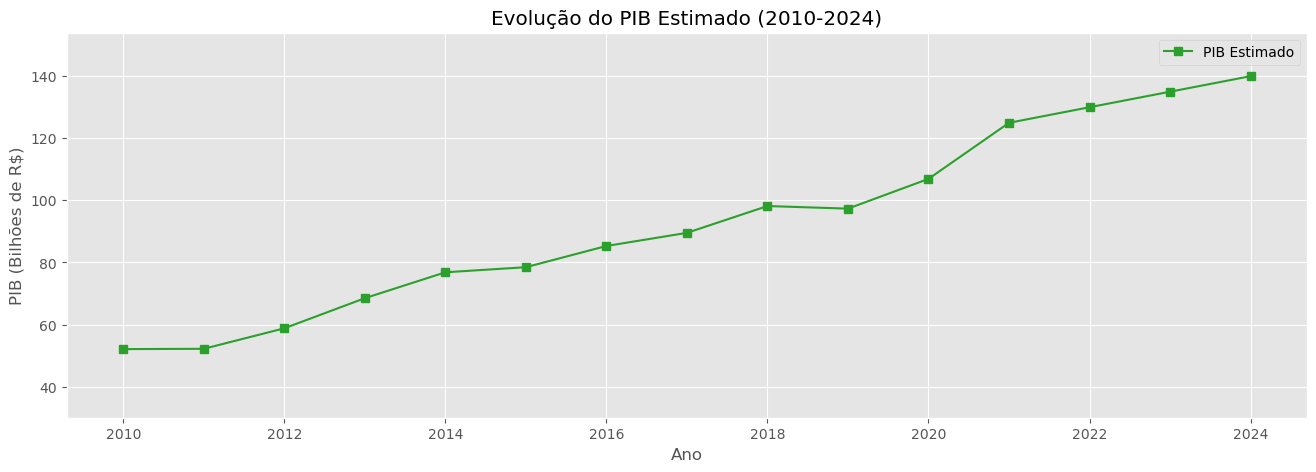

In [8]:
plt.figure(figsize=(16, 5))
plt.plot(df["Ano"], df["PIB Estimado (R$ em Bilhões)"], marker='s', linestyle='-', color='tab:green', label="PIB Estimado")

plt.xlabel("Ano")
plt.ylabel("PIB (Bilhões de R$)")
plt.title("Evolução do PIB Estimado (2010-2024)")
plt.legend()
plt.grid(True)

plt.ylim(30, df['PIB Estimado (R$ em Bilhões)'].max() * 1.1)

plt.show()

1.3 Renda per Capita

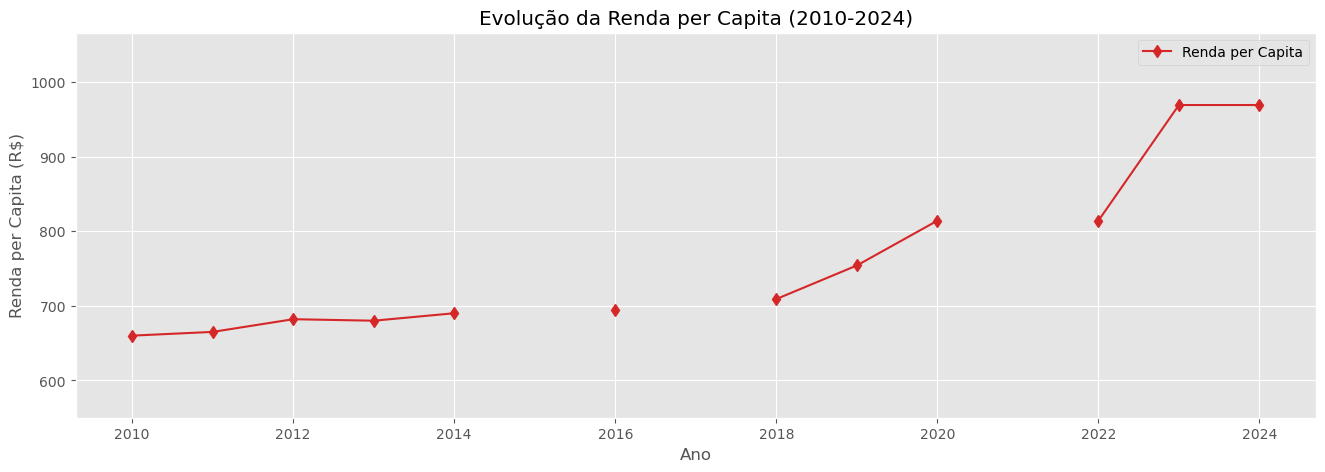

In [9]:
plt.figure(figsize=(16, 5))
plt.plot(df["Ano"], df["Renda per capita"], marker='d', linestyle='-', color='tab:red', label="Renda per Capita")

plt.xlabel("Ano")
plt.ylabel("Renda per Capita (R$)")
plt.title("Evolução da Renda per Capita (2010-2024)")
plt.legend()
plt.grid(True)

plt.ylim(550, df["Renda per capita"].max() * 1.1)

plt.show()

><br>
> 📌 Por que escolhi gráficos de linha?
>
> Os gráficos de linha são a melhor opção para visualizar dados temporais, pois permitem identificar tendências ao longo do tempo. Além disso, como visto no último gráfico, eles também ajudam a evidenciar valores ausentes, destacando possíveis lacunas nos dados <br>
> <br>

##### 2️⃣ Cálculo da velocidade e da aceleração do crescimento populacional, do PIB e da renda per capita. Em seguida, crie gráficos para visualizar esses parâmetros, incluindo títulos, legendas e descrições claras para cada eixo

2.1 Para calcular a velocidade e a aceleração do crescimento da população, do PIB e da renda per capita, seguimos os conceitos básicos de cálculo de variação:

- Velocidade do crescimento: Representa a taxa de variação anual do parâmetro analisado;
- Aceleração do crescimento: Representa a variação da velocidade ao longo do tempo

In [10]:
# Criação das colunas para velocidade do crescimento (diferença entre anos consecutivos)
df["Velocidade População"] = df["População Estimada"].diff()
df["Velocidade PIB"] = df["PIB Estimado (R$ em Bilhões)"].diff()
df["Velocidade Renda"] = df["Renda per capita"].diff()

# Criação das colunas para aceleração do crescimento (diferença da velocidade entre anos consecutivos)
df["Aceleração População"] = df["Velocidade População"].diff()
df["Aceleração PIB"] = df["Velocidade PIB"].diff()
df["Aceleração Renda"] = df["Velocidade Renda"].diff()

# Exibição das primeiras linhas para conferir os cálculos
display(df[["Ano", "Velocidade População", "Aceleração População",
            "Velocidade PIB", "Aceleração PIB",
            "Velocidade Renda", "Aceleração Renda"]])

,Ano,Velocidade População,Aceleração População,Velocidade PIB,Aceleração PIB,Velocidade Renda,Aceleração Renda
0,2010,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,76211.0,NaN,0.10,NaN,5.0,NaN
2,2012,76000.0,-211.0,6.60,6.50,17.0,12.0
3,2013,76000.0,0.0,9.70,3.10,-2.0,-19.0
4,2014,47884.0,-28116.0,8.34,-1.36,10.0,12.0
5,2015,53357.0,5473.0,1.64,-6.70,NaN,NaN
6,2016,49795.0,-3562.0,6.83,5.19,NaN,NaN
7,2017,47125.0,-2670.0,4.23,-2.60,NaN,NaN
8,2018,43894.0,-3231.0,8.64,4.41,NaN,NaN
9,2019,42207.0,-1687.0,-0.84,-9.48,45.0,NaN


2.2 Remoção da 1ª linha do DataFrame de velocidades e acelerações

In [11]:
# Excluir a primeira linha do DataFrame, pois não tem valores de velocidade/aceleração
df_velocidade_aceleracao = df.iloc[1:].reset_index(drop=True)
df_velocidade_aceleracao[["Ano", "Velocidade População", "Aceleração População",
            "Velocidade PIB", "Aceleração PIB",
            "Velocidade Renda", "Aceleração Renda"]]

,Ano,Velocidade População,Aceleração População,Velocidade PIB,Aceleração PIB,Velocidade Renda,Aceleração Renda
0,2011,76211.0,NaN,0.10,NaN,5.0,NaN
1,2012,76000.0,-211.0,6.60,6.50,17.0,12.0
2,2013,76000.0,0.0,9.70,3.10,-2.0,-19.0
3,2014,47884.0,-28116.0,8.34,-1.36,10.0,12.0
4,2015,53357.0,5473.0,1.64,-6.70,NaN,NaN
5,2016,49795.0,-3562.0,6.83,5.19,NaN,NaN
6,2017,47125.0,-2670.0,4.23,-2.60,NaN,NaN
7,2018,43894.0,-3231.0,8.64,4.41,NaN,NaN
8,2019,42207.0,-1687.0,-0.84,-9.48,45.0,NaN
9,2020,42738.0,531.0,9.58,10.42,60.0,15.0


2.3 Gráficos

2.3.1 População

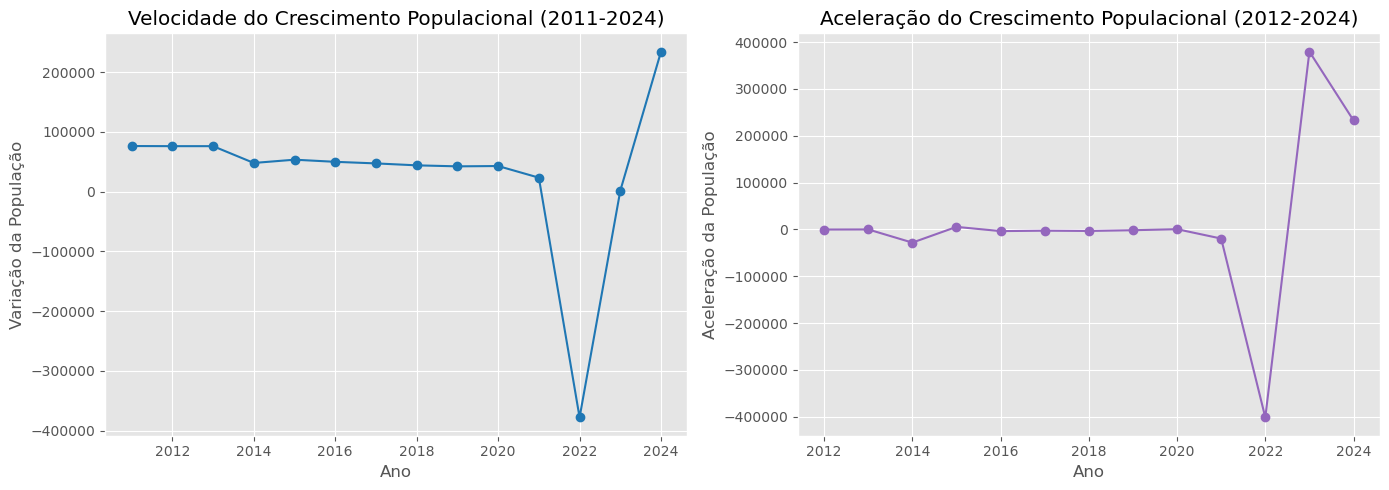

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(df_velocidade_aceleracao["Ano"], df_velocidade_aceleracao["Velocidade População"], marker='o', linestyle='-', color='tab:blue')
axes[0].set_title("Velocidade do Crescimento Populacional (2011-2024)")
axes[0].set_xlabel("Ano")
axes[0].set_ylabel("Variação da População")
axes[0].grid(True)

axes[1].plot(df_velocidade_aceleracao["Ano"], df_velocidade_aceleracao["Aceleração População"], marker='o', linestyle='-', color='tab:purple')
axes[1].set_title("Aceleração do Crescimento Populacional (2012-2024)")
axes[1].set_xlabel("Ano")
axes[1].set_ylabel("Aceleração da População")
axes[1].grid(True)

plt.tight_layout()
plt.show()

2.3.2 PIB

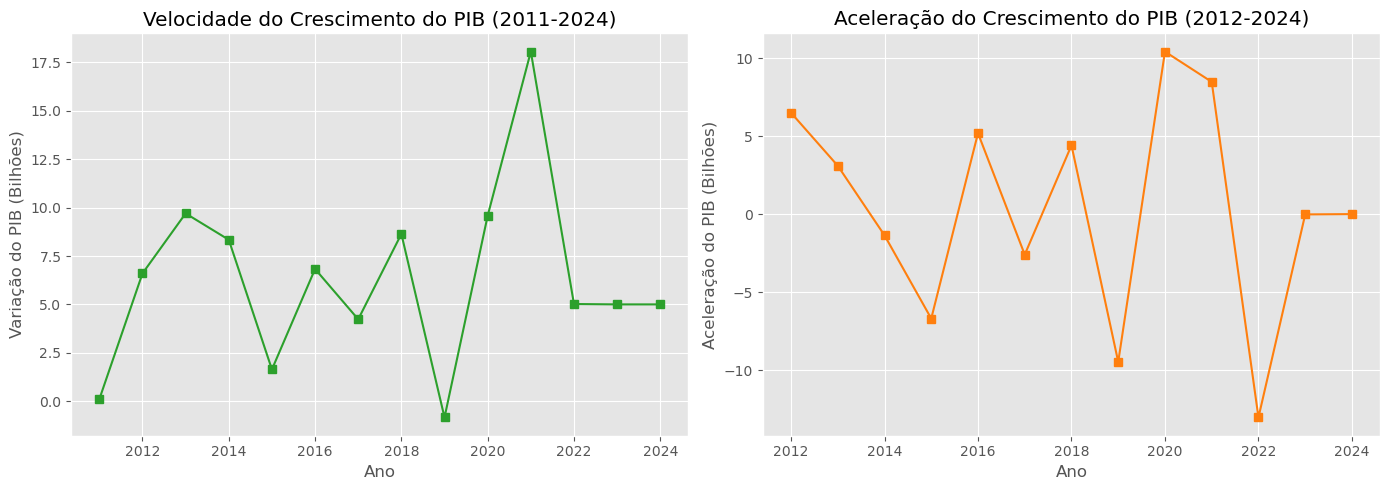

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(df_velocidade_aceleracao["Ano"], df_velocidade_aceleracao["Velocidade PIB"], marker='s', linestyle='-', color='tab:green')
axes[0].set_title("Velocidade do Crescimento do PIB (2011-2024)")
axes[0].set_xlabel("Ano")
axes[0].set_ylabel("Variação do PIB (Bilhões)")
axes[0].grid(True)

axes[1].plot(df_velocidade_aceleracao["Ano"], df_velocidade_aceleracao["Aceleração PIB"], marker='s', linestyle='-', color='tab:orange')
axes[1].set_title("Aceleração do Crescimento do PIB (2012-2024)")
axes[1].set_xlabel("Ano")
axes[1].set_ylabel("Aceleração do PIB (Bilhões)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

2.3.3 Renda per Capita

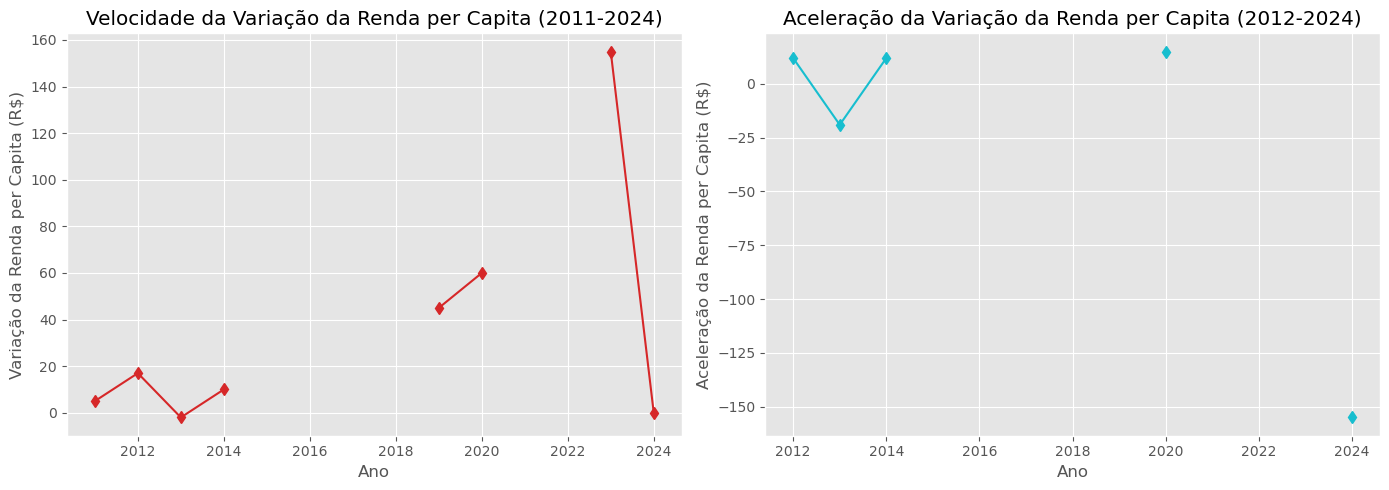

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(df_velocidade_aceleracao["Ano"], df_velocidade_aceleracao["Velocidade Renda"], marker='d', linestyle='-', color='tab:red')
axes[0].set_title("Velocidade da Variação da Renda per Capita (2011-2024)")
axes[0].set_xlabel("Ano")
axes[0].set_ylabel("Variação da Renda per Capita (R$)")
axes[0].grid(True)

axes[1].plot(df_velocidade_aceleracao["Ano"], df_velocidade_aceleracao["Aceleração Renda"], marker='d', linestyle='-', color='tab:cyan')
axes[1].set_title("Aceleração da Variação da Renda per Capita (2012-2024)")
axes[1].set_xlabel("Ano")
axes[1].set_ylabel("Aceleração da Renda per Capita (R$)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

> <br>
> 📌 Impacto dos valores ausentes no cálculo da velocidade e aceleração da Renda per Capita
>  
> A presença de valores ausentes na **Renda per Capita** impactou diretamente os cálculos de **velocidade** e **aceleração**. Como esses cálculos são baseados na variação entre anos consecutivos, a ausência de dados resultou em **lacunas** nos gráficos.
>  
> - **Velocidade**: Quando há valores ausentes, não é possível calcular a variação de um ano para outro, criando quebras na linha do gráfico. Isso faz com que alguns pontos da velocidade fiquem **desconectados**, refletindo anos sem dados disponíveis.  
> - **Aceleração**: Como a aceleração é baseada na variação da velocidade, os anos sem valores causam **descontinuidades ainda maiores**. Isso pode gerar **pontos isolados** e variações abruptas na aceleração, como observado no gráfico.  
>  
> Esses efeitos podem levar a **interpretações erradas** caso os dados ausentes não sejam tratados corretamente. <br>
> <br>

##### 3️⃣ Realização do tratamento dos dados na coluna 'Renda per capita', corrigindo os valores faltante, por meio de interpolação linear. Em seguida, crie um gráfico que apresente a renda per capita ao longo dos anos, comparando os dados antes e depois do tratamento

3.1 Criação de uma cópia da coluna original

In [15]:
# Crianção de uma cópia da coluna original para comparar antes e depois do tratamento
df["Renda per capita (Antes)"] = df["Renda per capita"]

3.2 Aplicar Interpolação Linear

In [16]:
# Aplicação da interpolação linear para preencher os valores ausentes
df["Renda per capita"] = df["Renda per capita"].interpolate(method='linear')
df["Renda per capita"]

0     660.0
1     665.0
2     682.0
3     680.0
4     690.0
5     692.0
6     694.0
7     701.5
8     709.0
9     754.0
10    814.0
11    814.0
12    814.0
13    969.0
14    969.0
Name: Renda per capita, dtype: float64

3.3 Criação do Gráfico Comparativo

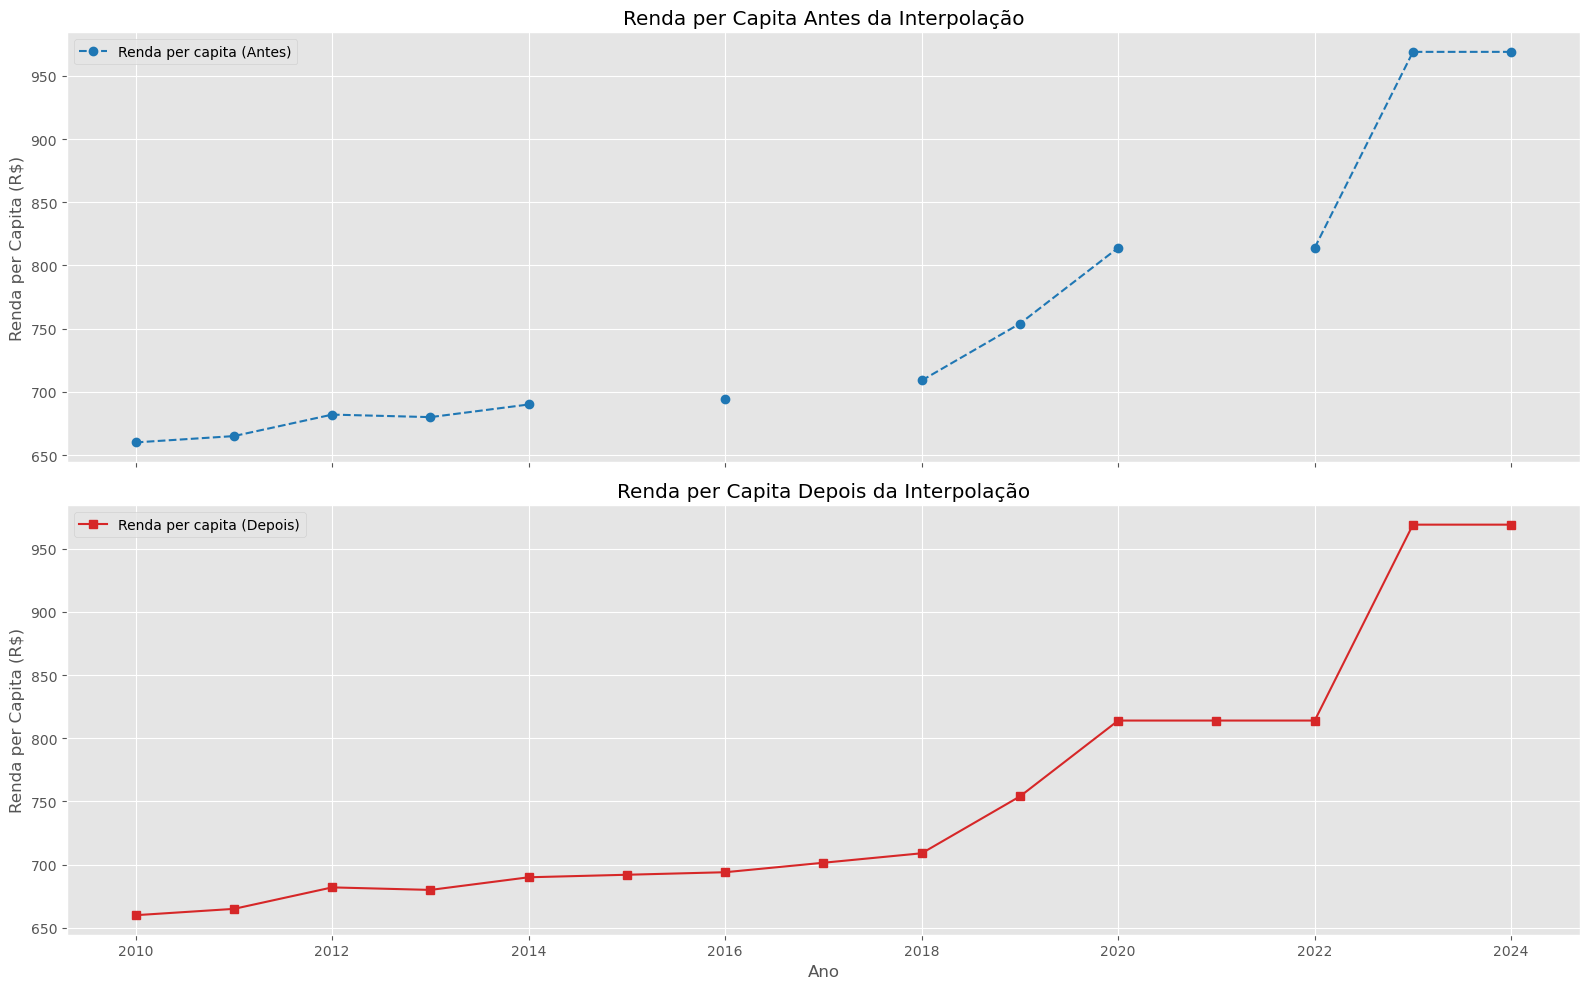

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

axes[0].plot(df["Ano"], df["Renda per capita (Antes)"], marker='o', linestyle='--', color='tab:blue', label="Renda per capita (Antes)")
axes[0].set_ylabel("Renda per Capita (R$)")
axes[0].set_title("Renda per Capita Antes da Interpolação")
axes[0].legend()
axes[0].grid(True)

axes[1].plot(df["Ano"], df["Renda per capita"], marker='s', linestyle='-', color='tab:red', label="Renda per capita (Depois)")
axes[1].set_xlabel("Ano")
axes[1].set_ylabel("Renda per Capita (R$)")
axes[1].set_title("Renda per Capita Depois da Interpolação")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()

plt.show()

##### 4️⃣ Calcule a média móvel para cada coluna, utilizando intervalos de 3 e 7 anos. Em seguida, crie gráficos para visualizar os resultados

4.1 Cálculo das Médias Móveis

In [18]:
# Aplicação da média móvel para suavizar os dados (em janelas de 3 e 7 anos)
df["Média Móvel População (3 anos)"] = df["População Estimada"].rolling(window=3).mean()
df["Média Móvel População (7 anos)"] = df["População Estimada"].rolling(window=7).mean()

df["Média Móvel PIB (3 anos)"] = df["PIB Estimado (R$ em Bilhões)"].rolling(window=3).mean()
df["Média Móvel PIB (7 anos)"] = df["PIB Estimado (R$ em Bilhões)"].rolling(window=7).mean()

df["Média Móvel Renda (3 anos)"] = df["Renda per capita"].rolling(window=3).mean()
df["Média Móvel Renda (7 anos)"] = df["Renda per capita"].rolling(window=7).mean()

# Formatando todas as colunas numéricas do DataFrame original para 2 casas decimais
df[["Média Móvel População (3 anos)", "Média Móvel População (7 anos)",
    "Média Móvel PIB (3 anos)", "Média Móvel PIB (7 anos)",
    "Média Móvel Renda (3 anos)", "Média Móvel Renda (7 anos)"]] = df[["Média Móvel População (3 anos)", "Média Móvel População (7 anos)",
                                                                        "Média Móvel PIB (3 anos)", "Média Móvel PIB (7 anos)",
                                                                        "Média Móvel Renda (3 anos)", "Média Móvel Renda (7 anos)"]].round(2)

# Exibição do dataframe com as médias móveis
df[["Ano", "Média Móvel População (3 anos)", "Média Móvel População (7 anos)",
                        "Média Móvel PIB (3 anos)", "Média Móvel PIB (7 anos)",
                        "Média Móvel Renda (3 anos)", "Média Móvel Renda (7 anos)"]]

,Ano,Média Móvel População (3 anos),Média Móvel População (7 anos),Média Móvel PIB (3 anos),Média Móvel PIB (7 anos),Média Móvel Renda (3 anos),Média Móvel Renda (7 anos)
0,2010,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,6650929.67,NaN,54.37,NaN,669.00,NaN
3,2013,6727000.00,NaN,59.83,NaN,675.67,NaN
4,2014,6793628.00,NaN,68.05,NaN,684.00,NaN
5,2015,6852708.33,NaN,74.61,NaN,687.33,NaN
6,2016,6903053.67,6780707.14,80.21,67.46,692.00,680.43
7,2017,6953146.00,6841617.43,84.44,72.81,695.83,686.36
8,2018,7000084.00,6897911.00,91.01,79.38,701.50,692.64
9,2019,7044492.67,6949377.00,95.02,84.88,721.50,702.93


4.2 Gráfico com Médias Móveis

4.2.1 População

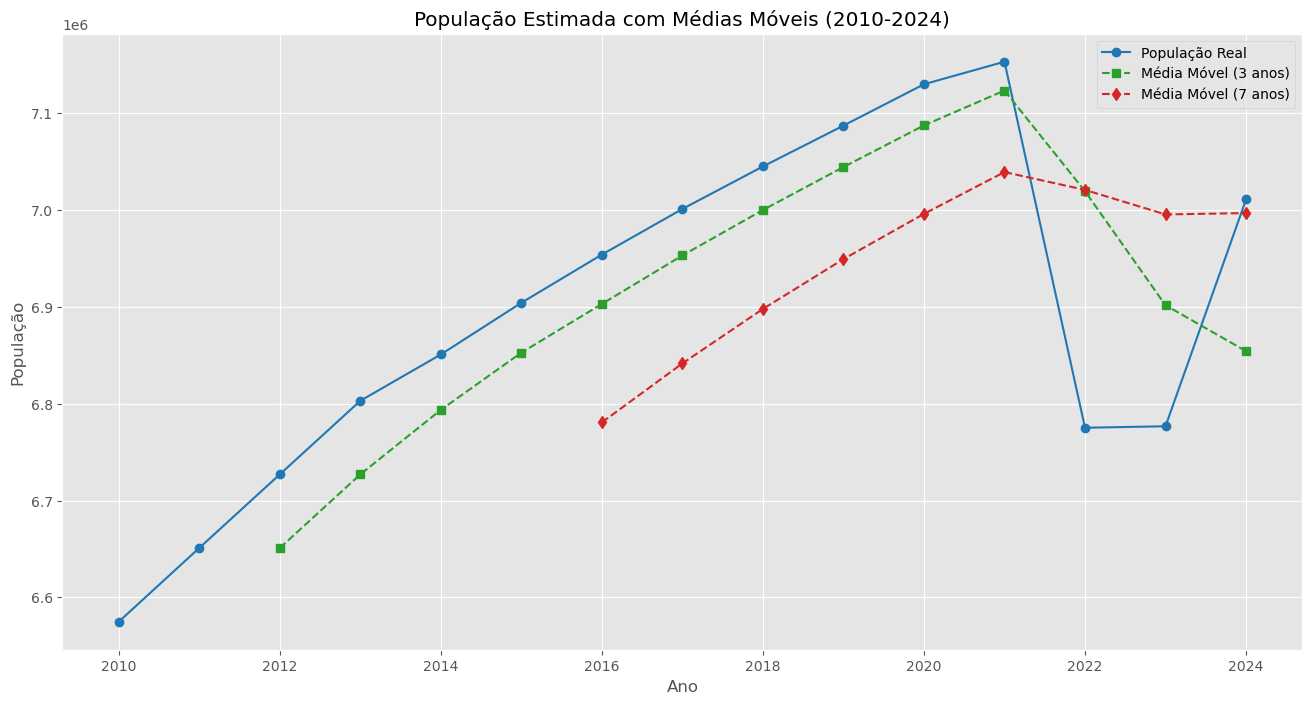

In [19]:
plt.figure(figsize=(16, 8))

plt.plot(df["Ano"], df["População Estimada"], marker='o', linestyle='-', color='tab:blue', label="População Real")

plt.plot(df["Ano"], df["Média Móvel População (3 anos)"], marker='s', linestyle='--', color='tab:green', label="Média Móvel (3 anos)")

plt.plot(df["Ano"], df["Média Móvel População (7 anos)"], marker='d', linestyle='--', color='tab:red', label="Média Móvel (7 anos)")

plt.xlabel("Ano")
plt.ylabel("População")
plt.title("População Estimada com Médias Móveis (2010-2024)")
plt.legend()
plt.grid(True)

plt.show()

4.2.2 PIB

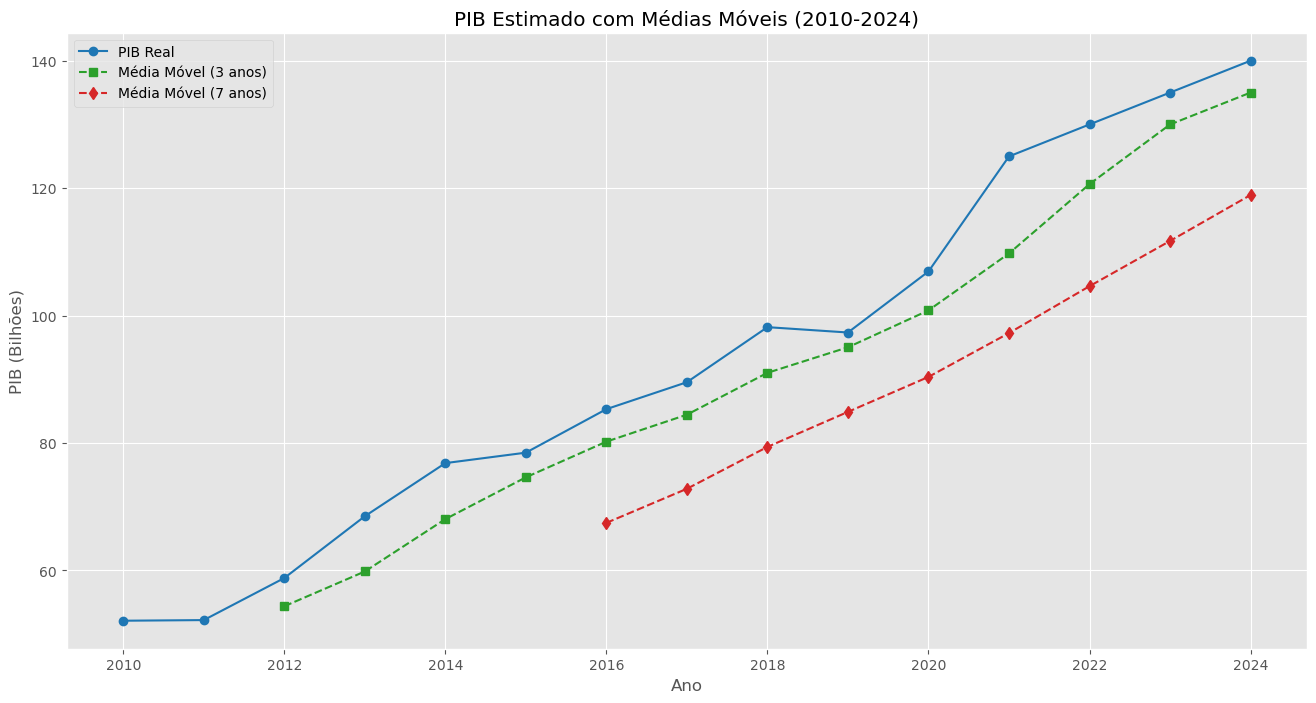

In [20]:
plt.figure(figsize=(16, 8))

plt.plot(df["Ano"], df["PIB Estimado (R$ em Bilhões)"], marker='o', linestyle='-', color='tab:blue', label="PIB Real")

plt.plot(df["Ano"], df["Média Móvel PIB (3 anos)"], marker='s', linestyle='--', color='tab:green', label="Média Móvel (3 anos)")

plt.plot(df["Ano"], df["Média Móvel PIB (7 anos)"], marker='d', linestyle='--', color='tab:red', label="Média Móvel (7 anos)")

plt.xlabel("Ano")
plt.ylabel("PIB (Bilhões)")
plt.title("PIB Estimado com Médias Móveis (2010-2024)")
plt.legend()
plt.grid(True)

plt.show()

4.2.3 Renda Per Capita

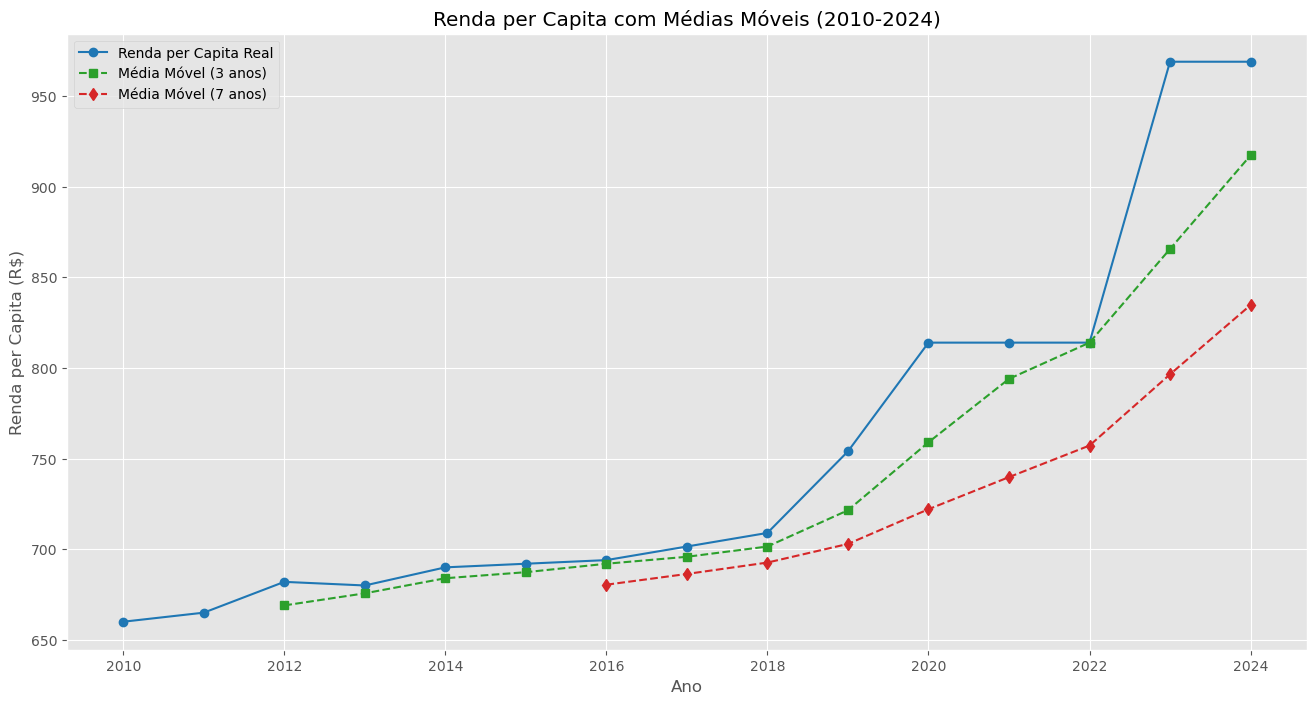

In [21]:
plt.figure(figsize=(16, 8))

plt.plot(df["Ano"], df["Renda per capita"], marker='o', linestyle='-', color='tab:blue', label="Renda per Capita Real")

plt.plot(df["Ano"], df["Média Móvel Renda (3 anos)"], marker='s', linestyle='--', color='tab:green', label="Média Móvel (3 anos)")

plt.plot(df["Ano"], df["Média Móvel Renda (7 anos)"], marker='d', linestyle='--', color='tab:red', label="Média Móvel (7 anos)")

plt.xlabel("Ano")
plt.ylabel("Renda per Capita (R$)")
plt.title("Renda per Capita com Médias Móveis (2010-2024)")
plt.legend()
plt.grid(True)

plt.show()

##### 5️⃣ Calcule a variância e o desvio padrão para cada coluna, utilizando as fórmulas especificadas

5.1 Cálculo das medidas amostrais

In [22]:
# Calculando a variância e o desvio padrão para cada coluna numérica
variancia = df.var(numeric_only=True, ddof=1)  # ddof=1 para amostra
desvio_padrao = df.std(numeric_only=True, ddof=1)  # ddof=1 para amostra

In [23]:
# Criando um DataFrame para exibir os resultados
df_estatisticas = pd.DataFrame({"Variância": variancia, "Desvio Padrão": desvio_padrao}).round(2)

# Formatando os valores para remover a notação científica e limitar a duas casas decimais
pd.options.display.float_format = '{:,.2f}'.format

# Removendo a coluna "Ano", pois não faz sentido calcular variância e desvio padrão para ela
df_estatisticas = df_estatisticas.drop(index="Ano", errors="ignore")
df_estatisticas.T

,População Estimada,PIB Estimado (R$ em Bilhões),Renda per capita,Velocidade População,Velocidade PIB,Velocidade Renda,Aceleração População,Aceleração PIB,Aceleração Renda,Renda per capita (Antes),Média Móvel População (3 anos),Média Móvel População (7 anos),Média Móvel PIB (3 anos),Média Móvel PIB (7 anos),Média Móvel Renda (3 anos),Média Móvel Renda (7 anos)
Variância,"31,337,970,592.35",875.32,"10,499.13","16,733,452,709.15",22.39,"2,793.64","29,892,200,739.73",49.19,"5,313.50","12,414.79","19,771,930,603.90","7,799,613,624.85",669.43,310.35,"6,409.37","2,821.71"
Desvio Padrão,"177,025.34",29.59,102.47,"129,357.85",4.73,52.85,"172,893.61",7.01,72.89,111.42,"140,612.70","88,315.42",25.87,17.62,80.06,53.12
